# Object Oriented Programming
Object oriented programming is a a paradigm which provides a means of structuring the program so that properties and behaviours are bundled into *objects*. Objects are logical subgroups which contain functions and data that are related together. You can also think of objects as things or ideas that you are trying to model through the program. For example, a bank account maybe an object, students enrolled in a class can be objects, characters in a game are objects, and as we shall see later - neural networks and their building blocks can be treated as objects.

I will re-iterate that this is not a programming course, and I'm not here to teach you the basics of coding. However, there are some important concepts I will go over in lab that I expect you to work on on your own if you want to succeed in this class.

Object oriented programming is one of them: the concept of classes and objects is incredibly important in Python (and many other languages). In this section we will review the basics of class definitions and demonstrate a few common cases.

## Resources
More information can be found on the foolowing websites:
1. [Lecture 8](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-0001-introduction-to-computer-science-and-programming-in-python-fall-2016/lecture-videos/lecture-8-object-oriented-programming/) and [Lecture 9](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-0001-introduction-to-computer-science-and-programming-in-python-fall-2016/lecture-videos/lecture-9-python-classes-and-inheritance/) of MIT OCW 6.0001
2. [These super cute slides](https://web.stanford.edu/class/archive/cs/cs106a/cs106a.1134/lectures/06/Slides06.pdf)
2. [Pyhton textbook](https://python-textbok.readthedocs.io/en/1.0/Object_Oriented_Programming.html#introduction)
3. [Understanding `super` and `__init__`](https://stackoverflow.com/questions/576169/understanding-python-super-with-init-methods)
4. [This guide](https://dev.to/charanrajgolla/beginners-guide---object-oriented-programming)
5. Google OOP lmao

I would highly recommend that you learn enough to understand abstraction, encapsulation and polymorphism. These concepts are key to understanding the motivation behind Object Oriented Programming.

## Classes
Each object is an instance of a *class*. You can think of a class as a blueprint with which you can create new objects. A class should represent a clear concept and provide a well defined interface. They will generally have two components: attributes (or state or data) and methods (or behaviour). We often use class based description to think about the world. For example, when I say cat, you would begin to think about its *attributes* - what colour is the cat, which breed is it, what is the age, does it have a name and so forth. You also would think about its behaviour - is it hungry, is it sleeping, can I pet it, etc. 

Now, defining a class in python is easy. We simply use the `class` keyword.



In [1]:
class Cat:
  pass

## Objects
As we said before, the objects are particular instances of a class. For example, Cat is a class but Tom, Sylvester and Garfield are 3 instances of this class and are objects. Each class should provide a method to create new objects called an initializer. Initializer will create a new object in memory and assign initial values to the attributes (hence initializer). In python, we have `__init__` method as the initializer ([Why the double underscores, you ask?](https://stackoverflow.com/questions/8689964/why-do-some-functions-have-underscores-before-and-after-the-function-name)).

In python, since we don't need to declare variables, we will directly write the `__init__` method and assign values to attributes.

In [2]:
class Cat:
  isHungry = False # class variable
  def __init__(self, name, age, breed):
    self.name = name # instance variable
    self.age = age
    self.breed = breed

What is that `self` thing? Well it represents the instance itself. It tells the computer to access its own attributes and/or methods. Let's see it in action.

In [3]:
# we create an instance of class Cat
catNextDoor = Cat("tom", 6, "shorthair")
# note that we just used the name cat and also did not pass self
age = 8
# we can access the attributes or methods of an object this way
catNextDoor.age

6

In [4]:
# Now let's create another cat
xisCat = Cat("boba", 2, "British Shorthair")
# Let us try to print it's age
xisCat.age

2

How did we know which age belongs to which cat? I am sure you noticed use of the name of the instance like `xisCat` then accessing the variable using the `.`.
How does it work? When you create an instance of a class, it is created in the memory. THe name retrieves from the memory that particular instance. Then, by using the `.`, you can obtain/get particular variables or functions *for that instance*. This is where the `self` is coming into play.

In [5]:
class Cat:
  isHungry = False
  def __init__(self, name, age, breed):
    # self variables are like pinned messages
    # they can be accessed anywhere inside the class
    self.name = name
    self.age = age
    self.breed = breed
    # to better demonstrate how self works, let's add a non self variable
    # non-self variables are accessible only inside the
    # function they are in
    dummy = 0
  
catNextDoor = Cat("tom", 6, "shorthair")
catNextDoor.dummy
  # should throw an error

AttributeError: ignored

Classes, like lists, are mutable. So when you do an assignment you're working with a reference and don't automatically perform as deep copy

In [6]:
catNextDoorCopy = catNextDoor
print(catNextDoor.age)
catNextDoorCopy.age = 10
print(catNextDoorCopy.age)
print(catNextDoor.age)

6
10
10


Let's add some methods to this class

In [7]:
class Cat:
  isHungry = False
  def __init__(self, name, age, breed, human=None): # initialization uses a default value
    self.name = name
    self.age = age
    self.breed = breed
    self.human = human

  def showAge(self):
    return self.age

  def giveHuman(self, name):
    self.human = name

    # Note how I add self to each method

In [8]:
lazyCat = Cat("garfield", 4, "orange tabby")
print(lazyCat.human)
lazyCat.giveHuman("Jon")
print(lazyCat.isHungry)
print(lazyCat.showAge())
print(lazyCat.human)
# note how I do not add self to any calls

xisCat = Cat("boba", 2, "British Shorthair", "Xi")
print(xisCat.isHungry)
print(xisCat.showAge())
print(xisCat.human)

# see how these things show different values?
# that is becuase the functions we write inside a class
# are limited to the particular instance of the class

None
False
4
Jon
False
2
Xi


## Advanced: Class Variables
```
class Cat:
    isHungry = False
```

Looking now at the next line, we can see `isHungry` declared. This variable is a little tricky, as it is actually part of the class rather than the instance  (This also means that if I was actually coding a cat, this is the wrong place for the `isHungry` variable)
. This means that we can call `Cat.isHungry` and get the value.

But what does this mean if we change the value of `isHungry`?

In [9]:
# But we could set it for the class
Cat.isHungry = "give me food"
print(xisCat.isHungry)
print(lazyCat.isHungry)

give me food
give me food


This is especially problematic if the class variables are mutable themselves, like a list. Let's look at another example.

In [10]:
# example class with lots going on
class ExampleClass(object):
    static_var = ['static'] # class variable
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = y
    
    def multiply(self):
        return self.x * self.y

    def swap(self):
        temp_x = self.x
        self.x = self.y
        self.y = temp_x
    
    def replace(self, x=None, y=None):
        if x is not None:
            self.x = x
        if y is not None:
            self.y = y

In [11]:
example_3 = ExampleClass(1, 2)
example_4 = ExampleClass(3, 4)

In [12]:
print(example_3.static_var)
print(example_4.static_var)
example_3.static_var.append(2)
print(example_3.static_var)
print(example_4.static_var)

['static']
['static']
['static', 2]
['static', 2]


Now it changes. This is because when the instance of the class is created it only copies the **reference** to the variable. 

So what do you do with this information? My advice: be cautious.

Only ever use class variables for static values that you don't expect to change. It isn't worth the hassle of remembering if the data type is mutable or not, and it may end up hurting you.

## Inheritance
If we have several descriptions with some commonality between these descriptions, we can group the descriptions and their commonality using *inheritance*. It is a way of arranging objects in a hierarchy from the most general to the most specific. An object which *inherits* from another object is considered to be a *subtype* of that object. It describes an "is a" relationship. For example, a duck is a bird, so if we have a general bird class, the duck class will inherit attributes and methods from it. Also, the duck class will be a subtype of the bird class. It is also described as a child-parent relationship.

In python, we simply change definition slightly and `__init__` function will include the `__init__` of the parent class.

In [13]:
class Felines:
  def __init__(self, type, isWild):
    self.type = type
    self.isWild = isWild

class Cat(Felines):
  def __init__(self, name, age, breed, type, isWild):
    super(Cat, self).__init__(type, isWild)
    self.name = name
    self.age = age
    self.breed = breed

  def showAge(self):
    return self.age
  
  def setHungry(self, value):
    self.isHungry = value

In [14]:
grannysCat = Cat("sylvester", 8, "tuxedo", "cat", False)
# now this object will have attributes from Felines as well Cat
print(grannysCat.type)
print(grannysCat.isWild)
grannysCat.showAge()

cat
False


8

## Class Exercise 1

1. Create a class called `Person` which has the following characteristics
    - Input variables which set the person's age and name
    - A function returns the person's age categorization with the following condtionals:
        - < 1 = infant
        - < 11 = child
        - < 18 = teenager
        - otherwise: adult
    - Write a function which updates the name
    - Write a function called `birthday` which increases the person's age by `1` and returns the new age

Create an instance of your class and test all your functions

In [15]:
class Person():
  def __init__(self, age, name):
    self.age = age
    self.name = name

  def age_category(self):
    if self.age < 1:
      return "infant"
    elif self.age < 11:
      return "child"
    elif self.age < 11:
      return "teenager"
    else:
      return "adult"
  
  def updateName(self, name):
    self.name = name
  
  def birthday(self):
    self.age = self.age + 1


p = Person(25, "Shrey")
print(p.age, p.name)

p.updateName("Shrey1")
print(p.name)

p.birthday()
print(p.age)

25 Shrey
Shrey1
26


## Class Exercise 2

2. Create a class called `Student` which inherits from `Person` and has the following characteristics
    - Input variables which set the student's major and university name
    - A function returns a desciption of the student
        - Their name, age, major and university

**Aside**: String formatting
- String formatting is super simple in python. You can insert variables directly into strings using "f strings":
```
x = 10
y = 100
v = "hello"
new_str = f"{v} world x is equal to {x}, Y is equal to {y}"
```


In [16]:
class Student(Person):
  def __init__(self, age, name, major, uni_name):
    super(Student, self).__init__(age, name)
    self.major = major
    self.uni_name = uni_name

  def show_description(self):
    return (self.name, self.age, self.major, self.uni_name)

s = Student(25, "Shrey", "AI", "Duke University")
s.show_description()

('Shrey', 25, 'AI', 'Duke University')

## How is Object Oriented Programming useful in Machine Learning?
The features that object oriented programming provides are extremely useful for us in this class. Tensorflow and PyTorch both extensively use classes in their implementation. 

For example, consider a neural network. It is a layered structure with outputs of each layer going on to the next one. No matter what kind of layer we are using, it would always need a few things - a weight matrix, a bias matrix, an input, a function that defines the forward pass and a way to update the weights just to name a few things. So, a "layer" can easily be abstracted as a base class. We can then build more specific layer classes like, say, a dense layer. Building specific classes by inheriting from a base class is also called as "extending" the base class. It will inherit all the attributes and methods from the base class and also have its own specific attributes and layers such as the number of neurons in the layer. Same is true for all the other in-built layer types in PyTorch and Tensorflow.

You can also "extend" the base class yourself, and build a custom layer yourself. An example might look like:
```
class Linear(keras.layers.Layer):
    def __init__(self, units=32, input_dim=32):
        super().__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(input_dim, units), dtype="float32"),
            trainable=True,
        )
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(
            initial_value=b_init(shape=(units,), dtype="float32"), trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b
```
You may not understand everything in this code, but try to see the broad strokes picture of how this works. We will discuss all these concepts in more detail in our Tensorflow sessions later on, but I want you to put a pin in this.

Classes and Objects are also an amazing way to organize and structure your code, even when it is not large scale. I found [this interesting article](https://dziganto.github.io/classes/data%20science/linear%20regression/machine%20learning/object-oriented%20programming/python/Understanding-Object-Oriented-Programming-Through-Machine-Learning/) that can motivate what we have learned so far.

To conclude, I want you to ponder a little on the ideas we discussed. Take some time and convince yourself that the toy Cat class is fundamentally no different than the layer class. The idea of classes and objects is the same whether you are programming a game, a GUI or a machine learning application. The concepts you deal with could be more or less abstract but more than often than not, you can put them into neat structures. With time, you can think of the entire world in terms of classes and objects.

## Class Exercise 3
3. Briefly describe a possible collection of classes which can be used to represent a music collection (for example, inside a music player), focusing on how they would be related by composition. You should include classes for songs, artists, albums and playlists. Hint: write down the four class names, draw a line between each pair of classes which you think should have a relationship, and decide what kind of relationship would be the most appropriate.
For simplicity you can assume that any song or album has a single “artist” value (which could represent more than one person), but you should include compilation albums (which contain songs by a selection of different artists). The “artist” of a compilation album can be a special value like “Various Artists”. You can also assume that each song is associated with a single album, but that multiple copies of the same song (which are included in different albums) can exist.

4. Write a simple implementation of this model which clearly shows how the different classes are composed. Write some example code to show how you would use your classes to create an album and add all its songs to a playlist. Hint: if two objects are related to each other bidirectionally, you will have to decide how this link should be formed – one of the objects will have to be created before the other, so you can’t link them to each other in both directions simultaneously!

In [17]:
class Artist:
  def __init__(self, name):
    self.name = name

class Song(Artist):
  def __init__(self, name, duration, artist):
    super().__init__(artist)
    self.name = name
    self.duration = duration

class Album(Artist):
  def __init__(self, name, artist):
    super().__init__(artist)
    self.name = name

class Playlist(Artist):
  def __init__(self, name, list_of_songs, artist):
    super().__init__(artist)
    self.name = name
    self.list_of_songs = list_of_songs

# Jupyter magic

There are some cool features that are good to know about jupyter, they're often referred to as "magic" commands as they don't follow normal python syntax


## Calling system commands

One great feature that jupyter provides is being able to make calls to the underlying system. We do this using the `!` operator at the beginning of a command

In [18]:
# getting the current directory
!pwd
# touching a file
!touch test_file
# listing the contents
!ls

/content
'Compound_Microscope_(cropped).JPG'     sample-zip-file.zip.1
'Compound_Microscope_(cropped).JPG.1'   Solid_BlueWhite_Logo.png
 sample_data			       'Solid_BlueWhite_Logo.png?width=1884'
 sample.txt			        test_file
 sample-zip-file.zip


If you're familiar with bash syntax then you can take advantage of these commands to seamlessly integrate bash and python

In [19]:
# create variable in python
value = 'hello world'
# use variable in bash
!echo $value

## This also works the other way
current_dir = !pwd
print(current_dir)

hello world
['/content']


## Useful bash commands
Some basic, but useful, commands you will see in this class mostly revolve around file management.

Let's say I want to download an image, I can use `wget`

In [20]:
!wget https://upload.wikimedia.org/wikipedia/commons/a/a5/Compound_Microscope_%28cropped%29.JPG

--2023-02-01 18:10:50--  https://upload.wikimedia.org/wikipedia/commons/a/a5/Compound_Microscope_%28cropped%29.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3188281 (3.0M) [image/jpeg]
Saving to: ‘Compound_Microscope_(cropped).JPG.2’

Compound_Microscope 100%[===================>]   3.04M  --.-KB/s    in 0.1s    

2023-02-01 18:10:51 (29.2 MB/s) - ‘Compound_Microscope_(cropped).JPG.2’ saved [3188281/3188281]



Or if I want to unzip a file

In [21]:
!wget https://www.learningcontainer.com/wp-content/uploads/2020/05/sample-zip-file.zip
!unzip sample-zip-file.zip

--2023-02-01 18:10:53--  https://www.learningcontainer.com/wp-content/uploads/2020/05/sample-zip-file.zip
Resolving www.learningcontainer.com (www.learningcontainer.com)... 172.67.188.164, 104.21.84.74, 2606:4700:3037::6815:544a, ...
Connecting to www.learningcontainer.com (www.learningcontainer.com)|172.67.188.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 380 [application/zip]
Saving to: ‘sample-zip-file.zip.2’

sample-zip-file.zip 100%[===================>]     380  --.-KB/s    in 0s      

2023-02-01 18:10:53 (8.37 MB/s) - ‘sample-zip-file.zip.2’ saved [380/380]

Archive:  sample-zip-file.zip
replace sample.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample.txt              


In [23]:
!ls

'Compound_Microscope_(cropped).JPG'     sample-zip-file.zip.1
'Compound_Microscope_(cropped).JPG.1'   sample-zip-file.zip.2
'Compound_Microscope_(cropped).JPG.2'   Solid_BlueWhite_Logo.png
 sample_data			       'Solid_BlueWhite_Logo.png?width=1884'
 sample.txt			        test_file
 sample-zip-file.zip


# Working with Images

In this class most of the data you deal with will be images. So it's useful to understand how to work with them and manipulate them.

When in python you will typically require an image processing library to read, write, and manipulate images. The major ones are:
- OpenCV
- PIL
- Scikit-Image

I usually use Scikit-Image, but that's simply my preference. 

In [24]:
# importing the input/output module from scikit-image
import skimage.io

# reading image
image = skimage.io.imread('Compound_Microscope_(cropped).JPG')
# showing image shape
image.shape

(3496, 2445, 3)

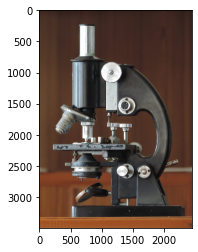

In [25]:
# we can use matplotlib to display images
import matplotlib.pyplot as plt
plt.imshow(image)

If you were to use OpenCV...

In [26]:
# importing opencv
import cv2

# reading image
image = cv2.imread('Compound_Microscope_(cropped).JPG')
# showing image shape
image.shape

(3496, 2445, 3)

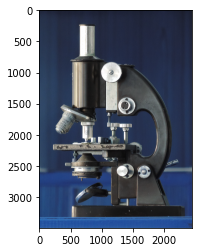

In [27]:
# we can use matplotlib to display images
import matplotlib.pyplot as plt
plt.imshow(image)

What looks wrong here?

OpenCV uses BGR, whereas everyone else using RGB

In [28]:
good_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

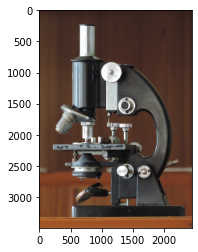

In [29]:
plt.imshow(good_image)

## Class Exercise 4
1. Download a random image from the internet using wget
2. Load that image using the library of your choice
3. Display the image using matplotlib
4. Create a 256x256 version of the image (find and use the resize function in your library)
5. Display the resized image

In [30]:
!wget https://d3cin4duo2vkym.cloudfront.net/images/2020/9/17/Solid_BlueWhite_Logo.png

--2023-02-01 18:11:14--  https://d3cin4duo2vkym.cloudfront.net/images/2020/9/17/Solid_BlueWhite_Logo.png
Resolving d3cin4duo2vkym.cloudfront.net (d3cin4duo2vkym.cloudfront.net)... 205.251.222.160, 205.251.222.99, 205.251.222.26, ...
Connecting to d3cin4duo2vkym.cloudfront.net (d3cin4duo2vkym.cloudfront.net)|205.251.222.160|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://dxbhsrqyrr690.cloudfront.net/sidearm.nextgen.sites/goduke.com/images/2020/9/17/Solid_BlueWhite_Logo.png [following]
--2023-02-01 18:11:15--  https://dxbhsrqyrr690.cloudfront.net/sidearm.nextgen.sites/goduke.com/images/2020/9/17/Solid_BlueWhite_Logo.png
Resolving dxbhsrqyrr690.cloudfront.net (dxbhsrqyrr690.cloudfront.net)... 143.204.14.151, 143.204.14.92, 143.204.14.39, ...
Connecting to dxbhsrqyrr690.cloudfront.net (dxbhsrqyrr690.cloudfront.net)|143.204.14.151|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13661 (13K) [image/png]
Saving to: ‘S

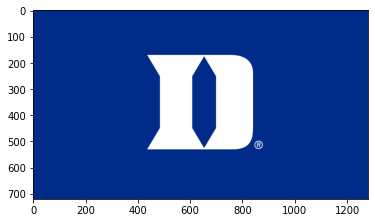

In [31]:
image = cv2.imread('Solid_BlueWhite_Logo.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

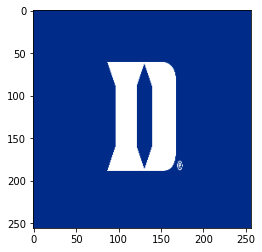

In [32]:
image = cv2.resize(image, (256, 256))
plt.imshow(image)

Resource for OpenCV: https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html

Resource for Scikit-Image: https://scikit-image.org/docs/stable/user_guide.html